## Generate a heatmap of a tv series episodes

In [19]:
# Libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Input show title to find the imdb id

#Variables
show = 'Money Heist'
url_search = 'https://www.imdb.com/find?q='

# Put the search term in the url_search     example: imdb.com/find?q=breaking+bad
for word in show.split():
    if url_search[-1] == '=':
        url_search = url_search + word
    else:
        url_search = url_search+'+'+word
#url_search

# Parse the get request
get_search = requests.get(url_search)
soup_search = BeautifulSoup(get_search.text, 'html.parser')

# Get the imdb_id
find_search = soup_search.find('tr', attrs={'class':'findResult odd'})
imdb_id = find_search.find('a')['href'].split('/')[2]
show = find_search.find_all('a')[1].text
print(show)
print(imdb_id)

Money Heist
tt6468322


In [21]:
# Use the imdb id to find the latest season available
get_home = requests.get('https://www.imdb.com/title/'+imdb_id)
soup_home = BeautifulSoup(get_home.text, 'html.parser')
#soup_home

# find the latest season available
find_home = soup_home.find('div', attrs = {'class': 'seasons-and-year-nav'})
max_season =  int(find_home.find('a').text)
print(max_season)

4


In [22]:
# Find the ratings for episodes in each season
records = []
for current_season in range(1,max_season+1):
    get_season = requests.get('https://www.imdb.com/title/'+imdb_id+'/episodes?season='+str(current_season))
    soup_season = BeautifulSoup(get_season.text, 'html.parser')
    
    # List of ratings
    find_season = soup_season.find_all('span', attrs={'class':'ipl-rating-star__rating'})[::23]     #ratings occur in every 23rd item
    
    episode = 1
    for rating in find_season:
        records.append((show, current_season, episode, float(rating.text)))
        episode += 1
        
# Add records to DataFrame 
df = pd.DataFrame(records, columns=['show', 'season', 'episode', 'rating'])     

# Num of season and episodes determine size of plot
max_season = df.season.max()    
max_episode = df.episode.max()

print(df.episode.count())
df

31


,show,season,episode,rating
0,Money Heist,1,1,8.4
1,Money Heist,1,2,8.4
2,Money Heist,1,3,8.2
3,Money Heist,1,4,8.3
4,Money Heist,1,5,8.4
5,Money Heist,1,6,8.3
6,Money Heist,1,7,8.4
7,Money Heist,1,8,8.2
8,Money Heist,1,9,8.7
9,Money Heist,2,1,8.6


In [23]:
# Pivot Table
df_pivot = df.pivot(index='season',columns='episode',values='rating')
df_pivot

episode,1,2,3,4,5,6,7,8,9
season,,,,,,,,,
1,8.4,8.4,8.2,8.3,8.4,8.3,8.4,8.2,8.7
2,8.6,8.5,8.8,8.8,8.8,9.4,NaN,NaN,NaN
3,8.2,8.4,8.4,8.1,8.0,8.3,8.4,9.5,NaN
4,7.4,7.1,7.0,7.5,7.0,7.3,8.3,8.3,NaN


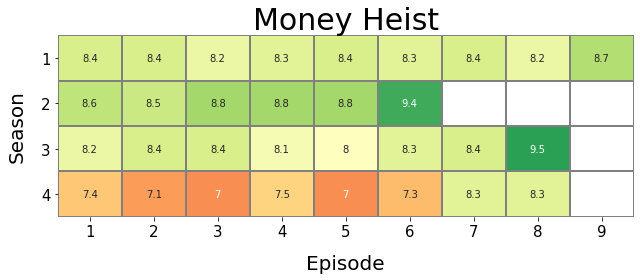

In [24]:
# Plot
f, ax = plt.subplots(figsize=(max_episode, max_season))
ax = sns.heatmap(df_pivot,vmin=6,vmax=10, annot=True,linewidths=1, cmap='RdYlGn', linecolor='gray', cbar=False)
ax.set_title(show,fontsize=30)
ax.set_xlabel('Episode',fontsize=20,labelpad=15)
ax.set_ylabel('Season',fontsize=20,labelpad=15)
ax.tick_params(labelsize=15)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(show+'.png')